In [1]:
import numpy as np
import matplotlib.pyplot as myplot
import pandas as pd
import seaborn as sns
import pickle
import os
import cv2
from gtts import gTTS

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape

(27455, 785)

In [4]:
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

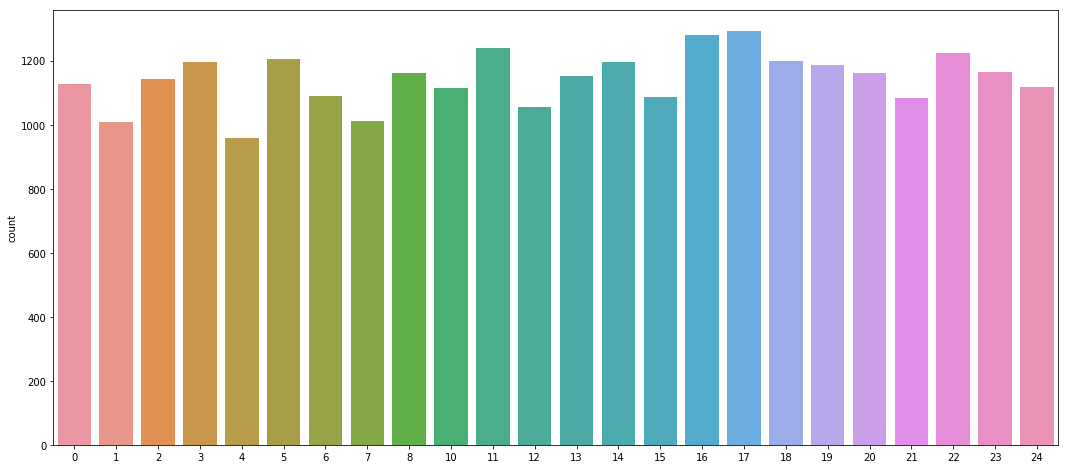

In [6]:
myplot.figure(figsize = (18,8))
sns.countplot(x =labels)

In [7]:
train.drop('label', axis = 1, inplace = True)

In [8]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

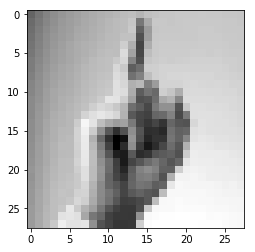

In [10]:
myplot.imshow(images[0].reshape(28,28),'gray')

In [11]:
labels[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 0)

## Decision Tree

In [13]:
#Fitting Decision Tree Classification from the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
filename = 'decision_tree.sav'
pickle.dump(classifier1, open(filename, 'wb'))

In [15]:
#Predicting the Test Set Results
y_pred1=classifier1.predict(x_test)

In [17]:
#Checking the Accuracy Scores
from sklearn.metrics import accuracy_score as ac
acc1=ac(y_test,y_pred1)
acc1

0.8872162194973898

## KNN

In [18]:
# Fitting KNN classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier2= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
#Predicting the Test Set Results
y_pred2=classifier2.predict(x_test)

In [20]:
#Checking the Accuracy Scores
from sklearn.metrics import accuracy_score as ac
acc2=ac(y_test,y_pred2)
acc2

0.9928371980089838

## Random Forest

In [21]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
#Predicting the Test Set Results
y_pred4=classifier4.predict(x_test)

In [23]:
#Checking the Accuracy Scores
from sklearn.metrics import accuracy_score as ac
acc4=ac(y_test,y_pred4)
acc4

0.867427461454413

# Neural Networks

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

C:\Users\Adheesh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)
#Normalizing the training and test data
x_train = x_train / 255
x_test = x_test / 255
print(x_train.shape)
print(x_test.shape)

(19218, 784)
(8237, 784)


In [26]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(19218, 28, 28, 1)
(8237, 28, 28, 1)


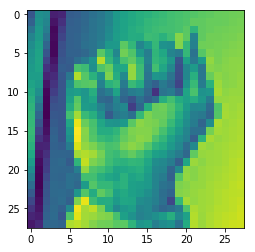

In [27]:
myplot.imshow(x_train[0].reshape(28,28))

In [28]:
y_train[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
batch_size = 128
num_classes = 24
epochs = 20

## CNN

In [30]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [31]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/20
19218/19218 [==============================] - 38s 2ms/step - loss: 2.5157 - acc: 0.2263 - val_loss: 1.4911 - val_acc: 0.5288
Epoch 2/20
19218/19218 [==============================] - 44s 2ms/step - loss: 1.1949 - acc: 0.5993 - val_loss: 0.7760 - val_acc: 0.7487
Epoch 3/20
19218/19218 [==============================] - 33s 2ms/step - loss: 0.7289 - acc: 0.7534 - val_loss: 0.4848 - val_acc: 0.8423
Epoch 4/20
19218/19218 [==============================] - 32s 2ms/step - loss: 0.4794 - acc: 0.8371 - val_loss: 0.3038 - val_acc: 0.91043
Epoch 5/20
19218/19218 [==============================] - 37s 2ms/step - loss: 0.3567 - acc: 0.8809 - val_loss: 0.2058 - val_acc: 0.9449
Epoch 6/20
19218/19218 [==============================] - 38s 2ms/step - loss: 0.2403 - acc: 0.9237 - val_loss: 0.1242 - val_acc: 0.9692
Epoch 7/20
19218/19218 [==============================] - 43s 2ms/step - loss: 0.1661 - acc: 0.9490 - val_loss: 0.1097 - val_acc

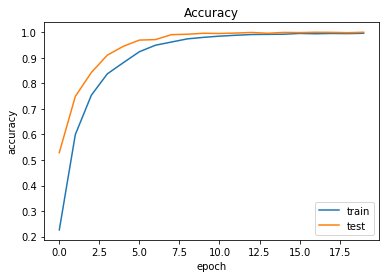

In [33]:
myplot.plot(history.history['acc'])
myplot.plot(history.history['val_acc'])
myplot.title("Accuracy")
myplot.xlabel('epoch')
myplot.ylabel('accuracy')
myplot.legend(['train','test'])
myplot.show()

In [35]:
score=model.evaluate(x_test,y_test)
score

8237/8237 [==============================] - 5s 585us/step


[0.0019948464445945038, 0.9998785965764234]

## Validation

In [36]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

In [37]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_images.shape

(7172, 784)

In [38]:
test_labels = label_binrizer.fit_transform(test_labels)

In [39]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [40]:
y_predN = model.predict(test_images)

In [42]:
ac(test_labels, y_predN.round())

0.8297546012269938

## Capturing Images

In [2]:
cam = cv2.VideoCapture(0)
img_counter = 0

while True:
    ret, frame = cam.read()
    frame=cv2.flip(frame,1)
    kernel = np.ones((3,3),np.uint8)
    roi=frame[100:300, 100:300]      
    cv2.rectangle(frame,(100,100),(300,300),(0,255,0),0)
   
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
       
    # define range of skin color in HSV
    lower_skin = np.array([0,20,70], dtype=np.uint8)
    upper_skin = np.array([20,255,255], dtype=np.uint8)
    
    #extract skin colour image  
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
         
    #extrapolate the hand to fill dark spots within
    mask = cv2.dilate(mask,kernel,iterations = 4)
                  
    #blur the image
    mask = cv2.GaussianBlur(mask,(5,5),100) 
        
    #Display the windows
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    
    if not ret:
        break
    k = cv2.waitKey(1)
  
    if k%256 == 27:   # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32: # SPACE pressed
        img_name = "{}.png".format(img_counter)
        cv2.imwrite(img_name, roi)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

Escape hit, closing...


## CONVERT .PNG to .CSV

In [ ]:
from PIL import Image
 
im = Image.open('Pictures.png')
 
#load the pixel info
pix = im.load()
 
#get a tuple of the x and y dimensions of the image
width, height = im.size
 
#open a file to write the pixel data
with open('output_file.csv', 'w+') as f:
    f.write('R,G,B\n')

#read the details of each pixel and write them to the file
  for x in range(width):
    for y in range(height):
        r = pix[x,y][0]
        g = pix[x,x][1]
        b= pix[x,x][2]
        f.write('{0},{1},{2}\n'.format(r,g,b))

## Text to Audio

In [45]:
tts=gTTS(text='Hello',lang='en')
tts.save("C://Users//Adheesh//Desktop//Welcome.mp3")
os.system("C://Users//Adheesh//Desktop//Welcome.mp3")